In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import tensorflow as tf 
%matplotlib inline

**Data Loading**

*Reading both datasets*

In [ ]:
df_credit=pd.read_csv('/content/credit_record.csv')
df_application=pd.read_csv('/content/application_record.csv')

In [ ]:
display(df_application)
display(df_credit)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

**Exploratory Data Analysis (EDA)**

In [ ]:
df_application = df_application.sort_values('ID')
df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423317,7999660,F,N,N,0,90000.0,State servant,Higher education,Single / not married,House / apartment,-13432,-5446,1,0,0,0,Core staff,1.0
426434,7999696,F,N,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-12576,-4382,1,0,0,0,Medicine staff,4.0
432885,7999738,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-9970,-119,1,0,0,0,NaN,2.0
421225,7999784,F,Y,Y,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10630,-454,1,0,0,0,NaN,3.0


In [ ]:
df_application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
df_credit.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [ ]:
df_application.drop_duplicates(subset=['ID']).count()

ID                     438510
CODE_GENDER            438510
FLAG_OWN_CAR           438510
FLAG_OWN_REALTY        438510
CNT_CHILDREN           438510
AMT_INCOME_TOTAL       438510
NAME_INCOME_TYPE       438510
NAME_EDUCATION_TYPE    438510
NAME_FAMILY_STATUS     438510
NAME_HOUSING_TYPE      438510
DAYS_BIRTH             438510
DAYS_EMPLOYED          438510
FLAG_MOBIL             438510
FLAG_WORK_PHONE        438510
FLAG_PHONE             438510
FLAG_EMAIL             438510
OCCUPATION_TYPE        304318
CNT_FAM_MEMBERS        438510
dtype: int64

In [ ]:
df_application.shape

(438557, 18)

In [ ]:
df_application.drop_duplicates(subset=['ID'], keep='last', inplace=True)

In [ ]:
df_application.shape

(438510, 18)

<Figure size 720x720 with 0 Axes>

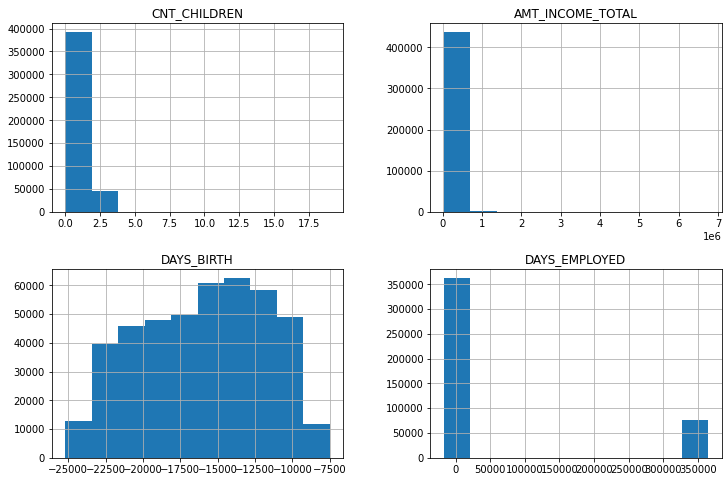

In [ ]:
plt.figure(figsize=(10,10))

columns = ["CNT_CHILDREN","AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]
df_application[columns].hist()
fig=plt.gcf()
fig.set_size_inches(12,8)

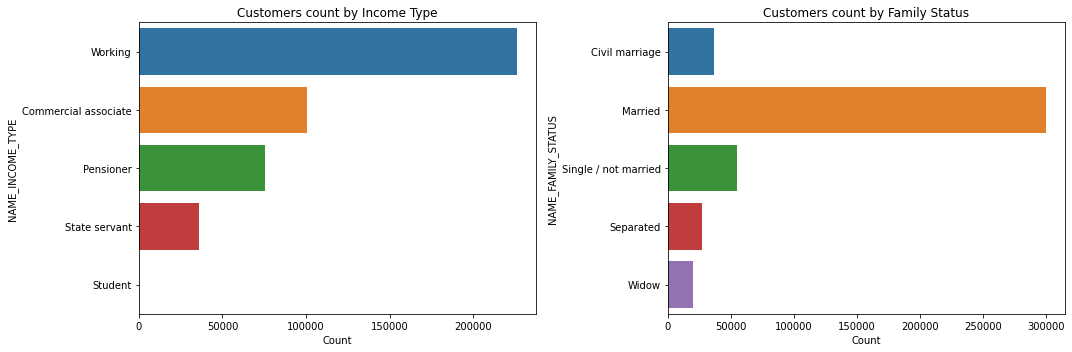

In [ ]:
fig, axes = plt.subplots(1,2)
pt_income=sns.countplot(y=df_application.NAME_INCOME_TYPE, ax=axes[0])
pt_income.set_title("Customers count by Income Type")
pt_income.set_xlabel("Count")

pt_family=sns.countplot(y=df_application.NAME_FAMILY_STATUS, ax=axes[1])
pt_family.set_title("Customers count by Family Status")
pt_family.set_xlabel("Count")
fig.set_size_inches(15,5)
plt.tight_layout()
plt.show()

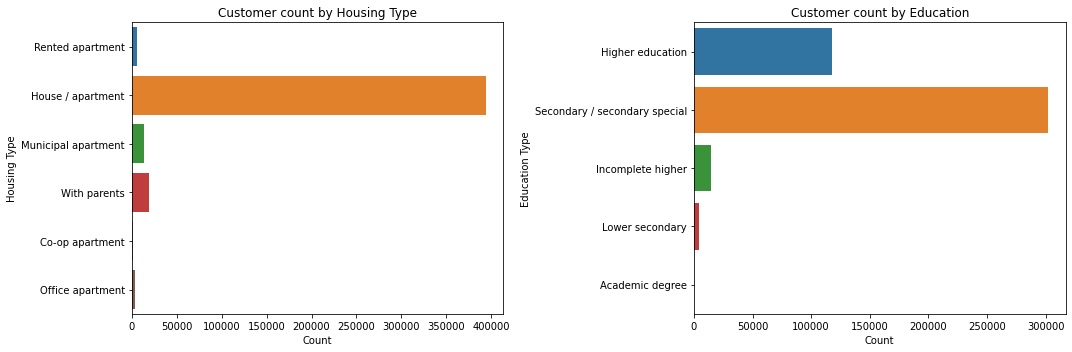

In [ ]:
fig, axes = plt.subplots(1,2)

pt_housing= sns.countplot(y=df_application.NAME_HOUSING_TYPE,ax=axes[0])
pt_housing.set_title("Customer count by Housing Type")
pt_housing.set_xlabel("Count")
pt_housing.set_ylabel("Housing Type")

pt_education= sns.countplot(y=df_application.NAME_EDUCATION_TYPE, ax=axes[1])
pt_education.set_title("Customer count by Education")
pt_education.set_xlabel("Count")
pt_education.set_ylabel("Education Type")
fig.set_size_inches(15,5)
plt.tight_layout()
plt.show()

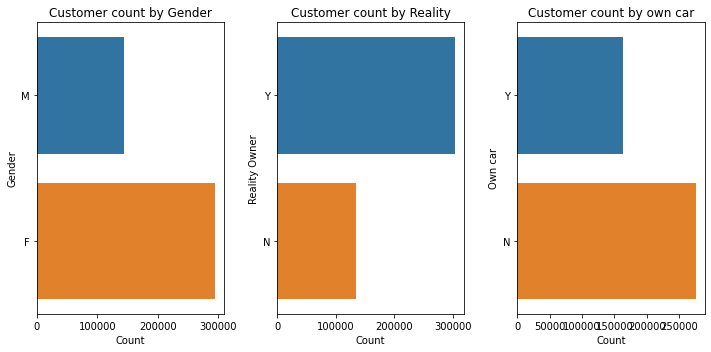

In [ ]:
fig, axes = plt.subplots(1,3)

pt_gender= sns.countplot(y=df_application.CODE_GENDER,ax=axes[0])
pt_gender.set_title("Customer count by Gender")
pt_gender.set_xlabel("Count")
pt_gender.set_ylabel("Gender")

pt_realty= sns.countplot(y=df_application.FLAG_OWN_REALTY,ax=axes[1])
pt_realty.set_title("Customer count by Reality")
pt_realty.set_xlabel("Count")
pt_realty.set_ylabel("Reality Owner")

pt_owncar= sns.countplot(y=df_application.FLAG_OWN_CAR, ax=axes[2])
pt_owncar.set_title("Customer count by own car")
pt_owncar.set_xlabel("Count")
pt_owncar.set_ylabel("Own car")
fig.set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [ ]:
df_credit = df_credit.sort_values('ID')
df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
22,5001712,-18,0
...,...,...,...
1048547,5150487,-2,C
1048546,5150487,-1,C
1048545,5150487,0,C
1048558,5150487,-13,C


*X,0,C are good debts*
*1,2,3,4,5 are considered as bad debts*

*X - no loan for that month*
*C- no loan for that month*
*0 - loan due for 1 to 30 days*

In [ ]:
group=df_credit.groupby('ID')['STATUS'].value_counts()
group

ID       STATUS
5001711  0          3
         X          1
5001712  0         10
         C          9
5001713  X         22
                   ..
5150483  X         18
5150484  0         12
         C          1
5150485  0          2
5150487  C         30
Name: STATUS, Length: 94143, dtype: int64

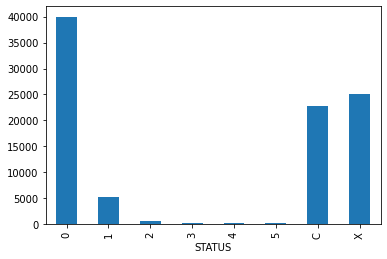

In [ ]:
df_credit.groupby('STATUS').count()
customer_count_for_status=group.groupby('STATUS').count()
customer_count_for_status.plot(kind='bar')

In [ ]:
grouped=pd.get_dummies(data=df_credit,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(df_credit['STATUS'].unique().tolist())].sum()

In [ ]:
df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423317,7999660,F,N,N,0,90000.0,State servant,Higher education,Single / not married,House / apartment,-13432,-5446,1,0,0,0,Core staff,1.0
426434,7999696,F,N,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-12576,-4382,1,0,0,0,Medicine staff,4.0
432885,7999738,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-9970,-119,1,0,0,0,NaN,2.0
421225,7999784,F,Y,Y,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10630,-454,1,0,0,0,NaN,3.0


**Preprocessing**

In [ ]:
df_application['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df_application = df_application.replace({'CODE_GENDER' : {'M' : 1,'F' : 0}})

In [ ]:
df_application['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df_application = df_application.replace({'FLAG_OWN_CAR' :
                                         {'Y' : 1,
                                          'N' : 0}})

In [ ]:
df_application['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df_customers = df_application.replace({'FLAG_OWN_REALTY' :
                                            {'Y' : 1,
                                             'N' : 0}})

In [ ]:
df_application['NAME_EDUCATION_TYPE'].unique()


array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
df_application['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df_application['CNT_FAM_MEMBERS'] = df_application['CNT_FAM_MEMBERS'].astype(int)

In [ ]:
df_application['AGE']=(df_application['DAYS_BIRTH']/365)*-1
df_application['AGE']=df_application['AGE'].apply(lambda v : int(v))

In [ ]:
df_application['YEARS_EMPLOYED']=df_application['DAYS_EMPLOYED']/365
df_application['YEARS_EMPLOYED']=df_application['YEARS_EMPLOYED'].apply(lambda s : int(s*-1)
if s <0 else 0)
df_application=df_application.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED'])
df_application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,1,1,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,32,12
1,5008805,1,1,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,32,12
2,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,58,3
3,5008808,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,8
4,5008809,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423317,7999660,0,0,N,0,90000.0,State servant,Higher education,Single / not married,House / apartment,1,0,0,0,Core staff,1,36,14
426434,7999696,0,0,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,0,0,Medicine staff,4,34,12
432885,7999738,1,0,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,27,0
421225,7999784,0,1,Y,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,3,29,1


***Calculate the z_scores in Python***



In [ ]:
def cal_z_scores(df, cols):
    for col in cols:
        df[col+"_z_score"] = (df[col] - df[col].mean())/df[col].std()
    return df

df_application = cal_z_scores(df_application, cols=["CNT_CHILDREN","AMT_INCOME_TOTAL", "YEARS_EMPLOYED"])


filter_2 = df_application.CNT_CHILDREN_z_score.abs() <= 3.5
filter_3 = df_application.AMT_INCOME_TOTAL_z_score.abs() <= 3.5
filter_4 = df_application.YEARS_EMPLOYED_z_score.abs() <= 3.5

df_application = df_application[filter_2 & filter_3 & filter_4]

df_application.drop(columns= ["CNT_CHILDREN_z_score","AMT_INCOME_TOTAL_z_score","YEARS_EMPLOYED_z_score"],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423880 entries, 0 to 424339
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   423880 non-null  int64  
 1   CODE_GENDER          423880 non-null  int64  
 2   FLAG_OWN_CAR         423880 non-null  int64  
 3   FLAG_OWN_REALTY      423880 non-null  object 
 4   CNT_CHILDREN         423880 non-null  int64  
 5   AMT_INCOME_TOTAL     423880 non-null  float64
 6   NAME_INCOME_TYPE     423880 non-null  object 
 7   NAME_EDUCATION_TYPE  423880 non-null  object 
 8   NAME_FAMILY_STATUS   423880 non-null  object 
 9   NAME_HOUSING_TYPE    423880 non-null  object 
 10  FLAG_MOBIL           423880 non-null  int64  
 11  FLAG_WORK_PHONE      423880 non-null  int64  
 12  FLAG_PHONE           423880 non-null  int64  
 13  FLAG_EMAIL           423880 non-null  int64  
 14  OCCUPATION_TYPE      292320 non-null  object 
 15  CNT_FAM_MEMBERS  

***Records with null values are being removed.***

In [ ]:
clean_df_application = df_application[df_application['OCCUPATION_TYPE'].notna()]

In [ ]:
df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
22,5001712,-18,0
...,...,...,...
1048547,5150487,-2,C
1048546,5150487,-1,C
1048545,5150487,0,C
1048558,5150487,-13,C


In [ ]:
df_credit['STATUSTEMP'] = df_credit['STATUS']

***Substituting 'Good Debt' for C, X, and 0. (C: loan for that month is already paid; X: no loan for that month; 0: loan is 1 to 29 days overdue).***
***Similarly, with 'Bad Debt,' 1, 2, 3, 4, 5 (1: loan is 30 to 59 days late; 2: loan is 60 to 89 days late; 3: loan is 90 to 119 days late; 4: loan is 120 to 149 days late; 5: loan is more than 150 days late).***

In [ ]:
df_credit = df_credit.replace({'STATUSTEMP' :
                                          {'X' : 'Good_Debt',
                                           'C' : 'Good_Debt',
                                           '0' : 'Good_Debt',
                                           '1' : 'Bad_Debt',
                                           '2' : 'Bad_Debt',
                                           '3' : 'Bad_Debt',
                                           '4' : 'Bad_Debt',
                                           '5' : 'Bad_Debt'}})

***The number of good and bad debts per customer Id is counted.***

In [ ]:
df_credit.value_counts(subset=['ID', 'STATUSTEMP']).unstack(fill_value=0)

STATUSTEMP,Bad_Debt,Good_Debt
ID,,
5001711,0,4
5001712,0,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,0,18
5150483,0,18
5150484,0,13


In [ ]:
df_Credit_result = df_credit.value_counts(subset=['ID', 'STATUSTEMP']).unstack(fill_value=0).reset_index()
df_Credit_result

STATUSTEMP,ID,Bad_Debt,Good_Debt
0,5001711,0,4
1,5001712,0,19
2,5001713,0,22
3,5001714,0,15
4,5001715,0,60
...,...,...,...
45980,5150482,0,18
45981,5150483,0,18
45982,5150484,0,13
45983,5150485,0,2


***Customers with a good debt count greater than a bad debt count are acceptable, and opposite.***

In [ ]:
df_Credit_result.loc[(df_Credit_result['Good_Debt'] > df_Credit_result['Bad_Debt']), 'Status'] = 1

In [ ]:
df_Credit_result.loc[(df_Credit_result['Good_Debt'] <= df_Credit_result['Bad_Debt']), 'Status'] = 0

In [ ]:
df_Credit_result['Status'] = df_Credit_result['Status'].astype(int)

In [ ]:
df_Credit_result

STATUSTEMP,ID,Bad_Debt,Good_Debt,Status
0,5001711,0,4,1
1,5001712,0,19,1
2,5001713,0,22,1
3,5001714,0,15,1
4,5001715,0,60,1
...,...,...,...,...
45980,5150482,0,18,1
45981,5150483,0,18,1
45982,5150484,0,13,1
45983,5150485,0,2,1


In [ ]:
df_customers = clean_df_application.merge(df_Credit_result, how='inner', on=['ID'])

In [ ]:
df_customers.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,Bad_Debt,Good_Debt,Status
0,5008806,1,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,58,3,0,30,1
1,5008808,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,8,0,5,1
2,5008809,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,8,0,5,1
3,5008810,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,8,0,27,1
4,5008811,0,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,52,8,0,39,1


In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24180 entries, 0 to 24179
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24180 non-null  int64  
 1   CODE_GENDER          24180 non-null  int64  
 2   FLAG_OWN_CAR         24180 non-null  int64  
 3   FLAG_OWN_REALTY      24180 non-null  object 
 4   CNT_CHILDREN         24180 non-null  int64  
 5   AMT_INCOME_TOTAL     24180 non-null  float64
 6   NAME_INCOME_TYPE     24180 non-null  object 
 7   NAME_EDUCATION_TYPE  24180 non-null  object 
 8   NAME_FAMILY_STATUS   24180 non-null  object 
 9   NAME_HOUSING_TYPE    24180 non-null  object 
 10  FLAG_MOBIL           24180 non-null  int64  
 11  FLAG_WORK_PHONE      24180 non-null  int64  
 12  FLAG_PHONE           24180 non-null  int64  
 13  FLAG_EMAIL           24180 non-null  int64  
 14  OCCUPATION_TYPE      24180 non-null  object 
 15  CNT_FAM_MEMBERS      24180 non-null 

In [ ]:
df_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,24180.0,5.078814e+06,41990.189298,5008806.0,5042226.75,5078978.5,5115621.5,5150487.0
CODE_GENDER,24180.0,3.800662e-01,0.485413,0.0,0.00,0.0,1.0,1.0
FLAG_OWN_CAR,24180.0,4.179074e-01,0.493225,0.0,0.00,0.0,1.0,1.0
CNT_CHILDREN,24180.0,4.710918e-01,0.686008,0.0,0.00,0.0,1.0,2.0
AMT_INCOME_TOTAL,24180.0,1.891670e+05,85107.281941,27000.0,135000.00,180000.0,225000.0,562500.0
FLAG_MOBIL,24180.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.0,1.0
FLAG_WORK_PHONE,24180.0,2.748139e-01,0.446430,0.0,0.00,0.0,1.0,1.0
FLAG_PHONE,24180.0,2.922250e-01,0.454795,0.0,0.00,0.0,1.0,1.0
FLAG_EMAIL,24180.0,1.005790e-01,0.300777,0.0,0.00,0.0,0.0,1.0
CNT_FAM_MEMBERS,24180.0,2.251778e+00,0.859288,1.0,2.00,2.0,3.0,4.0


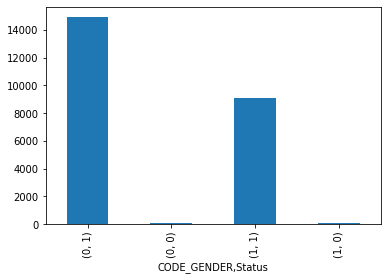

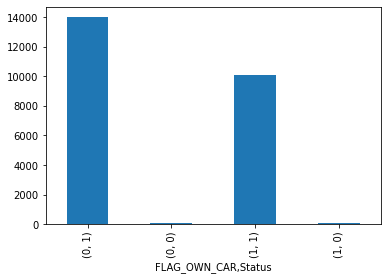

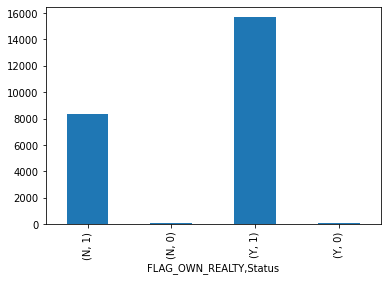

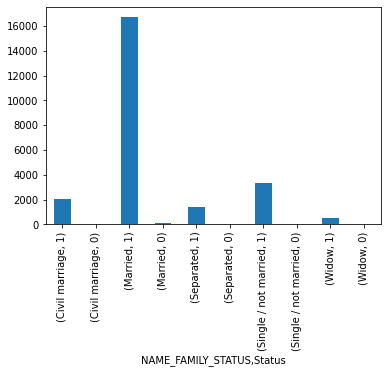

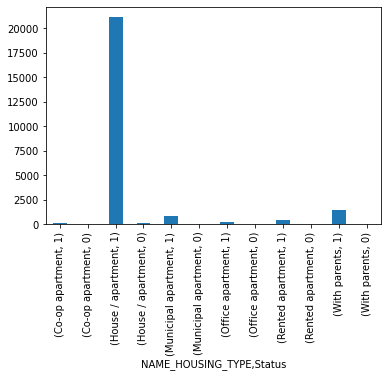

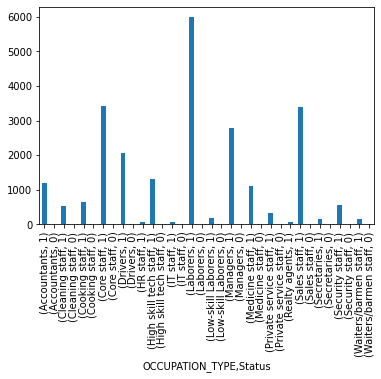

In [ ]:
columns=['CODE_GENDER',	'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE'
            ,'OCCUPATION_TYPE']
for i in  columns:
  df_customers.groupby(i)['Status'].value_counts().plot(kind='bar')
  plt.show()

**Modeling**

In [ ]:
df_modeling = df_customers.sample(frac=0.9, random_state=123)
df_unseen = df_customers.drop(df_modeling.index)

df_modeling.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)

print('Train Data for Modeling: ' + str(df_modeling.shape))
print('Test unseen Data: ' + str(df_unseen.shape))

Train Data for Modeling: (21762, 21)
Test unseen Data: (2418, 21)


**PYCaret**

*PyCaret is a low-code open-source machine learning software that allows Data Scientists to automate machine learning procedures. It speeds up the model trial process, allowing for more accurate result with less code.*

***Import important libraries and Installing PyCaret***

In [ ]:
!pip install pycaret
import pycaret
from pycaret.classification import *

     |████████████████████████████████| 301 kB 13.5 MB/s 
     |████████████████████████████████| 15.6 MB 60.7 MB/s 
     |████████████████████████████████| 167 kB 68.7 MB/s 
     |████████████████████████████████| 1.3 MB 51.4 MB/s 
     |████████████████████████████████| 114 kB 47.7 MB/s 
     |████████████████████████████████| 261 kB 56.6 MB/s 
     |████████████████████████████████| 274 kB 45.7 MB/s 
     |████████████████████████████████| 6.8 MB 61.6 MB/s 
     |████████████████████████████████| 2.0 MB 52.9 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 1.7 MB 52.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 636 kB 49.0 MB/s 
     |████████████████████████████████| 102 kB 13.9 MB/s 
     |████████████████

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
df_modeling

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,Bad_Debt,Good_Debt,Status
0,5052847,0,0,Y,0,45000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,1,0,Sales staff,2,43,3,0,55,1
1,5105117,0,0,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cooking staff,3,51,7,0,31,1
2,5095484,0,0,Y,1,157500.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,1,0,1,0,Laborers,2,42,0,0,22,1
3,5088872,0,0,Y,0,166500.0,Working,Secondary / secondary special,Single / not married,With parents,1,0,0,1,Sales staff,1,26,1,0,5,1
4,5091954,0,0,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,2,42,1,0,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21757,5105690,1,1,Y,0,180000.0,Working,Higher education,Single / not married,Co-op apartment,1,0,0,0,Drivers,1,25,0,0,13,1
21758,5067374,0,1,Y,0,315000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,1,0,Core staff,1,25,3,0,13,1
21759,5149817,0,0,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2,54,14,0,17,1
21760,5033700,1,1,Y,0,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,1,0,Laborers,2,35,1,0,33,1


In [ ]:
pycaret_setup= setup(data = df_modeling, 
            target = 'Status',
            train_size = 0.8,
            categorical_features = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                                    'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                    'NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE',
                                    'FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE'], 
            ignore_features = ['ID', 'Good_Debt', 'Bad_Debt'],
            fix_imbalance = True,
            session_id=123)

,Description,Value
0,session_id,123
1,Target,Status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(21762, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


***compare_models() will compare the performance of several models on our train data modeling set.***

In [ ]:
bestModel_to_compare = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9948,0.5514,0.9994,0.9954,0.9974,0.1164,0.1325,8.679
lightgbm,Light Gradient Boosting Machine,0.9945,0.6474,0.9989,0.9956,0.9972,0.1617,0.1964,1.078
rf,Random Forest Classifier,0.9944,0.6595,0.9988,0.9956,0.9972,0.1612,0.1908,2.853
et,Extra Trees Classifier,0.9940,0.6522,0.9981,0.9959,0.9970,0.2162,0.2334,2.682
dt,Decision Tree Classifier,0.9922,0.5944,0.9964,0.9958,0.9961,0.1789,0.1818,0.513
ada,Ada Boost Classifier,0.9858,0.5931,0.9904,0.9953,0.9928,0.0420,0.0452,2.003
knn,K Neighbors Classifier,0.9446,0.6161,0.9481,0.9961,0.9715,0.0354,0.0639,1.151
lr,Logistic Regression,0.8909,0.5407,0.8949,0.9951,0.9264,0.0001,0.0010,0.579
lda,Linear Discriminant Analysis,0.7386,0.5541,0.7407,0.9955,0.8492,0.0026,0.0114,0.387
ridge,Ridge Classifier,0.7384,0.0000,0.7404,0.9955,0.8491,0.0026,0.0113,0.091


In [ ]:
bestModel_to_compare

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

***Evaluate Model Function***

In [ ]:
evaluate_model(bestModel_to_compare)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

***Plot the Model***

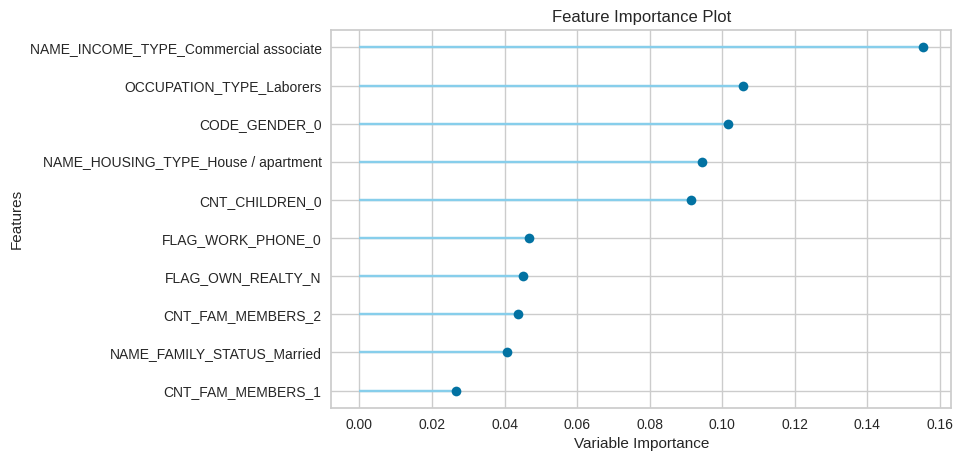

In [ ]:
plot_model(bestModel_to_compare, plot='feature')

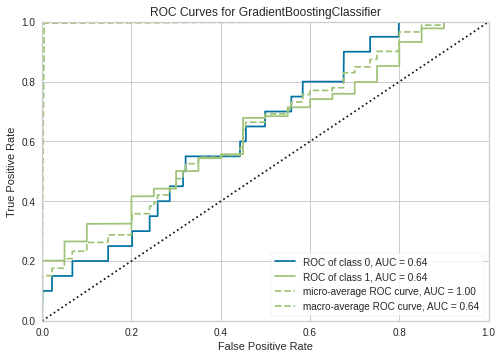

In [ ]:
plot_model(bestModel_to_compare, plot = 'auc')

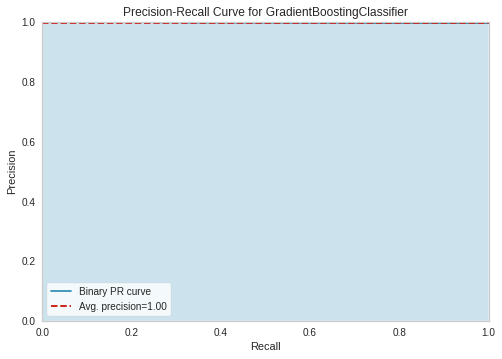

In [ ]:
plot_model(bestModel_to_compare, plot = 'pr')

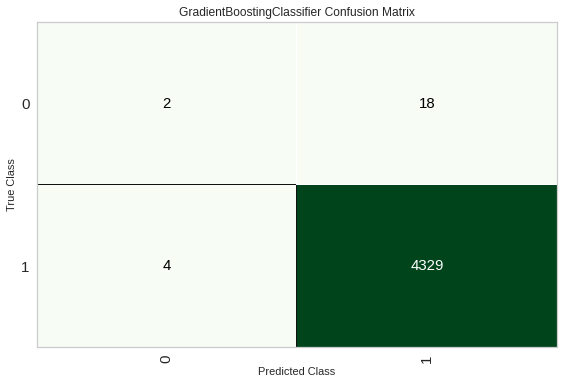

In [ ]:
plot_model(bestModel_to_compare, plot = 'confusion_matrix')

***Implementing Best Model***

In [ ]:
dt_gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9954,0.5582,0.9994,0.9960,0.9977,0.1985,0.2484
1,0.9948,0.5084,0.9994,0.9954,0.9974,-0.0010,-0.0016
2,0.9948,0.5151,1.0000,0.9948,0.9974,0.0000,0.0000
3,0.9960,0.8396,0.9994,0.9965,0.9980,0.4598,0.4984
4,0.9948,0.5866,1.0000,0.9948,0.9974,0.0000,0.0000
5,0.9948,0.5300,1.0000,0.9948,0.9974,0.0000,0.0000
6,0.9931,0.3358,0.9983,0.9948,0.9965,-0.0026,-0.0030
7,0.9948,0.6785,0.9994,0.9954,0.9974,0.1803,0.2340
8,0.9937,0.5001,0.9988,0.9948,0.9968,-0.0019,-0.0024
9,0.9954,0.4615,0.9988,0.9965,0.9977,0.3313,0.3515


**Tunning**

In [ ]:
tuning_gcb = tune_model(dt_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9954,0.6653,0.9994,0.9960,0.9977,0.1985,0.2484
1,0.9943,0.6461,0.9988,0.9954,0.9971,-0.0018,-0.0023
2,0.9954,0.5825,1.0000,0.9954,0.9977,0.1992,0.3326
3,0.9954,0.8690,0.9988,0.9965,0.9977,0.4265,0.4452
4,0.9937,0.5967,0.9988,0.9948,0.9968,-0.0019,-0.0024
5,0.9954,0.5394,1.0000,0.9954,0.9977,0.1992,0.3326
6,0.9943,0.4987,0.9994,0.9948,0.9971,-0.0010,-0.0017
7,0.9937,0.7705,0.9983,0.9954,0.9968,0.1511,0.1638
8,0.9943,0.8227,0.9988,0.9954,0.9971,0.1645,0.1901
9,0.9954,0.4149,0.9988,0.9965,0.9977,0.3313,0.3515


In [ ]:
predict_model(tuning_gcb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9949,0.6806,0.9991,0.9959,0.9975,0.152,0.1806


,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CODE_GENDER_0,FLAG_OWN_CAR_0,FLAG_OWN_REALTY_N,CNT_CHILDREN_0,CNT_CHILDREN_1,CNT_CHILDREN_2,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_MOBIL_1,FLAG_WORK_PHONE_0,FLAG_PHONE_0,FLAG_EMAIL_0,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CNT_FAM_MEMBERS_1,CNT_FAM_MEMBERS_2,CNT_FAM_MEMBERS_3,CNT_FAM_MEMBERS_4,Status,Label,Score
0,459000.0,43.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9477
1,112500.0,48.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9953
2,202500.0,38.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9989
3,270000.0,36.0,6.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9975
4,180000.0,39.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,157500.0,28.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9985
4349,121500.0,27.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9866
4350,112500.0,36.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9955
4351,157500.0,41.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9939


**Finalizing the model**

In [ ]:
final_model = finalize_model(tuning_gcb)
print(final_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


**Predictions on Unseen Data**

In [ ]:
predict = predict_model(final_model, data=df_unseen)
predict

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,Bad_Debt,Good_Debt,Status,Label,Score
0,5008826,0,1,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,1,0,0,0,Accountants,2,29,3,7,23,1,1,0.9951
1,5008832,0,0,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Laborers,2,27,4,2,33,1,1,0.9971
2,5008843,1,0,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,3,32,5,0,30,1,1,0.9957
3,5008860,0,1,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,4,43,8,0,4,1,1,0.9964
4,5008864,0,1,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,4,43,8,0,3,1,1,0.9964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,5150465,0,1,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Core staff,3,38,0,0,11,1,1,0.9952
2414,5150475,1,1,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,0,Laborers,2,29,3,0,44,1,1,0.9917
2415,5150482,0,1,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Core staff,3,29,4,0,18,1,1,0.9976
2416,5150484,0,1,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Core staff,3,29,4,0,13,1,1,0.9976


**Saving Model and Predictions**

In [ ]:
save_model(final_model,'creditCardApproval_prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['CODE_GENDER',
                                                             'FLAG_OWN_CAR',
                                                             'FLAG_OWN_REALTY',
                                                             'NAME_INCOME_TYPE',
                                                             'NAME_EDUCATION_TYPE',
                                                             'NAME_FAMILY_STATUS',
                                                             'NAME_HOUSING_TYPE',
                                                             'FLAG_MOBIL',
                                                             'FLAG_WORK_PHONE',
                                                             'FLAG_PHONE',
                                                             'FLAG_EMAIL',
                                                             'OCCUPATION_TYPE'],


In [ ]:
predict.to_csv('predictions.csv', index=False)